K Nearest Neighbors

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [19]:
url = 'https://raw.githubusercontent.com/RyanNolanData/YouTubeData/main/500hits.csv'
df = pd.read_csv(url, encoding='latin-1')

In [20]:
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [22]:
df.drop(["PLAYER", "CS"], axis = 1, inplace = True)
#df.drop(columns=["PLAYER", "CS"], inplace= True)

In [23]:
df

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,15,1920,6653,1105,1665,285,39,291,964,1224,1427,225,0.250,0
461,17,1829,6092,900,1664,379,10,275,1065,936,1453,20,0.273,0
462,15,1834,6499,1062,1661,338,67,210,761,960,1190,315,0.256,0
463,16,1822,6309,714,1660,254,25,54,593,396,489,74,0.263,0


In [25]:
X = df.iloc[:, :13]
y = df.iloc[:, 13]
X

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,15,1920,6653,1105,1665,285,39,291,964,1224,1427,225,0.250
461,17,1829,6092,900,1664,379,10,275,1065,936,1453,20,0.273
462,15,1834,6499,1062,1661,338,67,210,761,960,1190,315,0.256
463,16,1822,6309,714,1660,254,25,54,593,396,489,74,0.263


In [26]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 11)

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [43]:
X_train.shape

(372, 13)

In [29]:
knn = KNeighborsClassifier(n_neighbors = 8)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [31]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1])

In [32]:
knn.score(X_test, y_test)

0.8279569892473119

In [38]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8279569892473119

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55, 12],
       [ 4, 22]])

<Axes: >

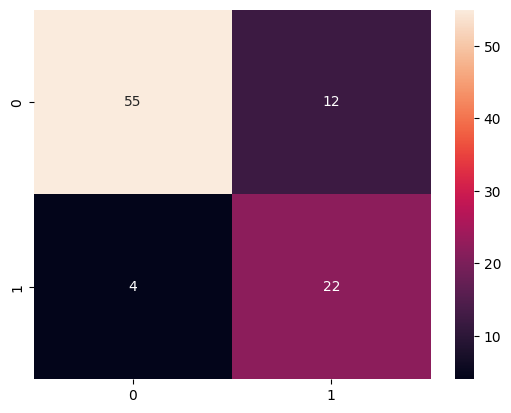

In [40]:
sns.heatmap(cm, annot=True)

In [42]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        67
           1       0.65      0.85      0.73        26

    accuracy                           0.83        93
   macro avg       0.79      0.83      0.80        93
weighted avg       0.85      0.83      0.83        93



In [44]:
knn.n_samples_fit_ #number of training data it fitted

372